# 大纲
# 1、数据爬取
# 2、词云展示
# 3、原因分析
# 4、解决方案

## 1、数据爬取

In [1]:
# -*- coding: utf-8 -*-
import requests
import time
import json
import re

from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np

import jieba
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def weibo_comment():
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36",
        "cookie":"XXXXXXXXXX  YOUR COOKIE"
    }
    max_id = ""
    datalist = []
    while True:
        if max_id == "":
            url = "https://m.weibo.cn/comments/hotflow?id=4677380206235606&mid=4677380206235606&max_id_type=0"
        else:
            url = "https://m.weibo.cn/comments/hotflow?id=4677380206235606&mid=4677380206235606&max_id="+str(max_id)+"&max_id_type=0"                                                                                          
#         print(url)
        
        response = requests.get(url, headers=headers)
#         print(response)
        js = response.json()
    
        if js['ok'] == 0:
            break
    
        max_id = js["data"]["max_id"]
#         print(max_id) 
        
        for i in js['data']['data']:
            comment_list = []
            comment_user = i['user']['screen_name']
            comment_list.append(comment_user)   #评论人
            
            comment_user_gender = i['user']['gender']
            comment_list.append(comment_user_gender)    #性别
            
            comment_text = i['text']
            p = re.compile(r'(<span.*>.*</span>)*(<a.*>.*</a>)?')
            comment_text = p.sub(r'', comment_text)
            comment_list.append(comment_text)     #评论内容
            
#             comment_time = i['created_at'] 
#             comment_list.append(comment_time)   #评论时间
            
            comment_floor = i['floor_number'] 
            comment_list.append(comment_floor)  #回复数
            
            
            datalist.append(comment_list)
            
        time.sleep(3)
            
    return datalist

In [3]:
comment = weibo_comment()
data=DataFrame(comment)

In [4]:
data.columns = ['commenter','gender','text','floor']
data.head()

,commenter,gender,text,floor
0,MissX兔兔,m,人家也不说不要女的呀。就说你不符合条件，你怎么办,5
1,每日美好,f,感觉挺难的…现在很多企业就是不明说，但就会用各种理由把女的刷掉,17
2,cp磕到头掰掉,f,。。这很难，除非有政策，要求企业女员工比例多少，或者女员工多有一定税务政策优惠。。才能真的保...,7
3,睹尔忆晴江,m,可以男女同修产假吗？能解决很多歧视了,119
4,司马蒂荧,f,三胎政策一出，有几个企业会明说不要女性？“方便问您现在的婚姻情况吗？”“因为还有其他候选人需...,31


In [5]:
data.to_csv('./data.csv',index=False,header=True)    #数据保存（不要index，保存header）

In [5]:
data

,commenter,gender,text,floor
0,MissX兔兔,m,人家也不说不要女的呀。就说你不符合条件，你怎么办,5
1,每日美好,f,感觉挺难的…现在很多企业就是不明说，但就会用各种理由把女的刷掉,17
2,cp磕到头掰掉,f,。。这很难，除非有政策，要求企业女员工比例多少，或者女员工多有一定税务政策优惠。。才能真的保...,7
3,睹尔忆晴江,m,可以男女同修产假吗？能解决很多歧视了,119
4,司马蒂荧,f,三胎政策一出，有几个企业会明说不要女性？“方便问您现在的婚姻情况吗？”“因为还有其他候选人需...,31
...,...,...,...,...
293,王贝语的嘎拉哈,f,工地呀，出差呀什么的 都搞起来，但凡能干点正事儿，.....,4064
294,香蕉你个不林林,m,这个很难监管吧,4056
295,椰香啵叽奶糕,f,自从三胎政策出来之后，真的很担心就业问题,4022
296,太阳没睡,f,换位思考，如果我们是老板也是怎么样让公司盈利，所以就需要国家的鼓励支持政策了,4018


## 2、绘制词云图

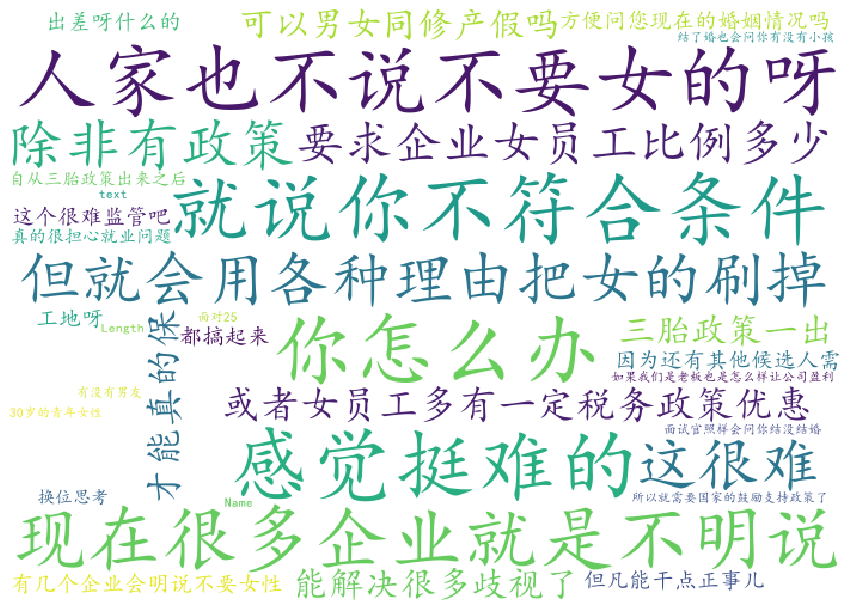

In [6]:
wordcloud=WordCloud(font_path="C:/Windows/Fonts/simkai.ttf",background_color='white',width=700,height=500,max_words=50).generate(str(data['text'])[:645])
plt.figure(figsize=[15,12])
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("1all_comment(不分词).jpg")
plt.show()

In [7]:
comment = data['text'].dropna(how='any') #去掉空值
all_comment = ''.join(i for i in comment) #把所有字符串连接成一个长文本
comment_new = re.sub(re.compile('，|；|\.|、|。'),'',all_comment) #去掉逗号等符号
comment_new

'人家也不说不要女的呀就说你不符合条件你怎么办感觉挺难的…现在很多企业就是不明说但就会用各种理由把女的刷掉这很难除非有政策要求企业女员工比例多少或者女员工多有一定税务政策优惠才能真的保护女性就业可以男女同修产假吗？能解决很多歧视了三胎政策一出有几个企业会明说不要女性？“方便问您现在的婚姻情况吗？”“因为还有其他候选人需要一一面试所以有消息我们后续会联系您”很多都是隐性性别歧视女性很多都是隐形性别歧视我们去应聘都要问恋爱情况和准备什么时候结婚要孩子男生不会问长胖了还要单独找你谈话委婉让你注意形象让我痩下来成了公司任务（因为要对接面对其他公司）那个月天天只吃一半米饭晚上抽时间拿个减肉神器撸腿和肚子一个月痩两圈我领导才松口太难了希望政策赶紧下来作为HR我可以说很难实现我的职业素养令我不可能告诉女性求职者或者说我不会告诉任何求职者不录用他的真实原因通常都是用一些模糊的借口所以除非政府强行规定比例或者给予奖励否则无法令公司认真执行希望落实到位我之前的公司每天就是压榨女员工每次要我管理身材如果长肉就要挨批还要扣工资所以天天喝酸酸饮减三十多才摆休 最严重就是给我们定制专门的衣服让我们去陪酒 拿我们当盘菜辞职之后又下狠话让我们无立足之地 希望能保护女性就业对招聘有性别歧视的单位进行处罚你们是真傻还是装傻？就喊下口号你觉得你能敷衍谁啊？你们是真傻还是装傻？就喊下口号你觉得你能敷衍谁啊？明着歧视没有了暗地里话语术：你先回去等通知;很抱歉现在这个岗位已经招满了如果有空缺我们会联系你！我以前长得黑了点去应聘前台工作都被刷下来了！后来吃番茄丸变白了以后去找工作又被因为我太漂亮可能会结婚怀孕影响工作而没录取！政府把官员的任用比例提高到50%以上用人单位也不会歧视女性啦！政府都不作为你凭什么要求企业？人家肯定不会直说你是女生不要你啊明着歧视没有了暗地里话语术：你先回去等通知;很抱歉现在这个岗位已经招满了如果有空缺我们会联系你;通过这段时间的试用我们觉着你和这个岗位的要求有差距所以……;行为上：生完孩子以后突然会发现你的办公室你的岗位被人顶了你是多余的;不然就是被通知转岗不断说“你不适合这个岗位”一方面生三胎一方面又歧视女性就业年齡歧視沒有人關注？延退休單位都招25-35男性强制产假女性产假结束男性强制产假孩子出生之后就要妇联去查男的有没有休产假和计划生育那时候挨家挨户查啊你们觉得用人单位会直接告

In [8]:
wordlist=" ".join(jieba.cut(comment_new)) #分词后连接
font_path=r'C:\Windows\Fonts\simkai.ttf'
stopwords = list(STOPWORDS)+['你','了','呢','啊','的','没有','但是','就是','因为','还有','这个','那个','这样','什么']# 停用词

Building prefix dict from the default dictionary ...
Loading model from cache C:\Windows\Temp\jieba.cache
Loading model cost 0.717 seconds.
Prefix dict has been built successfully.


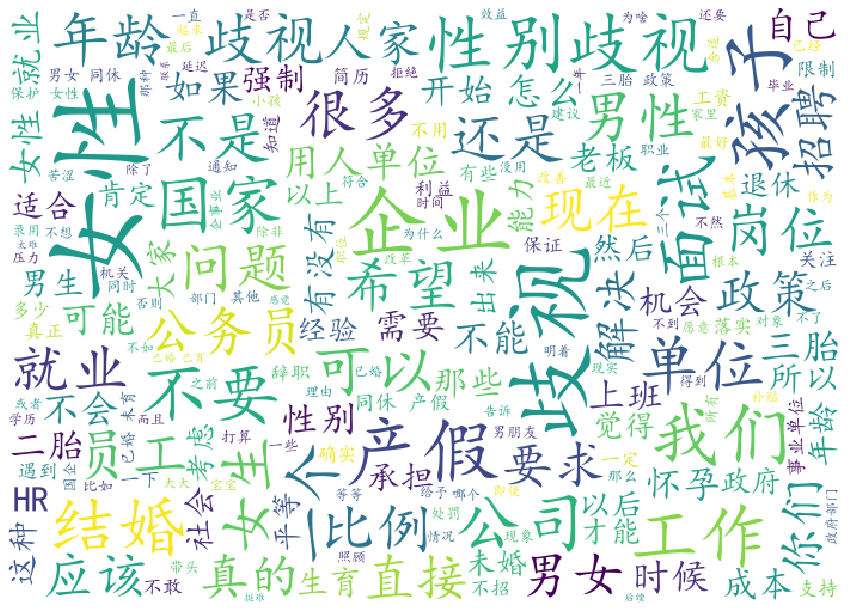

In [9]:
wc = WordCloud(font_path=font_path,  # 设置字体

              background_color="white",  # 背景颜色

              max_words=200,  # 词云显示的最大词数

              stopwords = stopwords,        # 设置停用词

              max_font_size=100,  # 字体最大值

              width=700, 
               
               height=500,
               
               margin=2,# 设置图片默认的大小,margin为词语边缘距离

              ).generate(wordlist)

plt.figure(figsize=[15,12])

plt.imshow(wc)

plt.axis("off")

plt.savefig("2/all_comment.jpg")#必须在plt.show之前，不是图片空白

plt.show()

## 3、评论人分析

In [10]:
data.sort_values(by='floor',ascending=False)

,commenter,gender,text,floor
297,西普宝-,f,面对25-30岁的青年女性，面试官照样会问你结没结婚，有没有男友，结了婚也会问你有没有小孩，...,8066
212,阿荣和他的老公,m,"企业有自主选择权,企业不想用女性职工你也不能强迫,当然这应该在招聘之前提前说明",8057
213,王贝语的嘎拉哈,f,越吵吵现实越糟糕，国企不了解，私企就是看能力价值效益，生孩子耽误时间和发展，还是得从家里找补...,8029
214,怂兮兮呀,f,不用打开都知道歧视那部分,8015
215,张张张明白,f,我们公司，生活孩子的女性都被认为稳定，加工资也多,8008
...,...,...,...,...
0,MissX兔兔,m,人家也不说不要女的呀。就说你不符合条件，你怎么办,5
125,粑婊,m,希望能真正落实,4
29,非雨晓鹤,m,希望落实到位。,3
211,王抑云先生,m,对不起我们不招女的嘿嘿,2


### 3.1热评分析

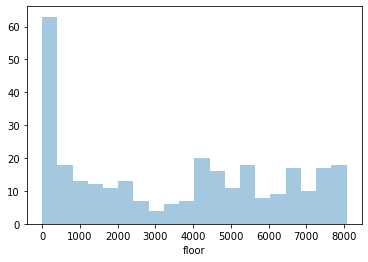

In [11]:
sns.distplot(data['floor'],bins=20,kde=False)

In [12]:
hot_comment = data[data['floor'].apply(lambda x: x > 7500)]

In [13]:
hot_comment

,commenter,gender,text,floor
105,符朵拉,f,不从就业解决问题，三胎政策根本不现实。,7971
162,棕砼QAQ,m,有的专业确实女性不适合，比如重体力劳动，你说你一个女的，你非要去，你去了能干啥，干活肯定不如...,7829
163,蜗牛牵着猪,m,性别歧视背后是年龄歧视，单纯的性别歧视是非常少的，大多数被歧视的女性都是过了30岁，尤其是过...,7803
164,蜗牛牵着猪,m,有些歧视是国家带头的，比如公考35岁限制，当然，国家本意不是歧视，但是传导到社会，就形成了3...,7770
165,蜗牛牵着猪,m,比起隐性的性别歧视，明目张胆的年龄歧视更应该重视。中国的年龄歧视不是40岁不是45岁不是50...,7732
166,学不死就往死里学啊喵呜,f,就应该男女都强制休产假，女生休完上班男生开始休带娃，这样就谁也不歧视了,7721
167,Mon-666666,f,我们公司要求女性入职一年内不能怀孕呢,7606
212,阿荣和他的老公,m,"企业有自主选择权,企业不想用女性职工你也不能强迫,当然这应该在招聘之前提前说明",8057
213,王贝语的嘎拉哈,f,越吵吵现实越糟糕，国企不了解，私企就是看能力价值效益，生孩子耽误时间和发展，还是得从家里找补...,8029
214,怂兮兮呀,f,不用打开都知道歧视那部分,8015


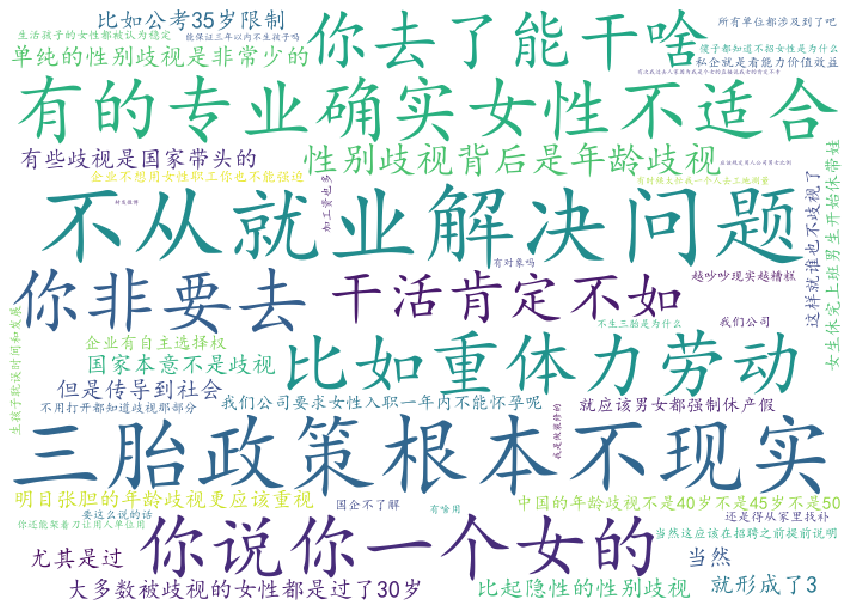

In [15]:
wordcloud=WordCloud(font_path="C:/Windows/Fonts/simkai.ttf",background_color='white',width=700,height=500,max_words=50).generate(str(hot_comment['text'])[:1825])
plt.figure(figsize=[15,12])
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("hot_comment(不分词).jpg")
plt.show()

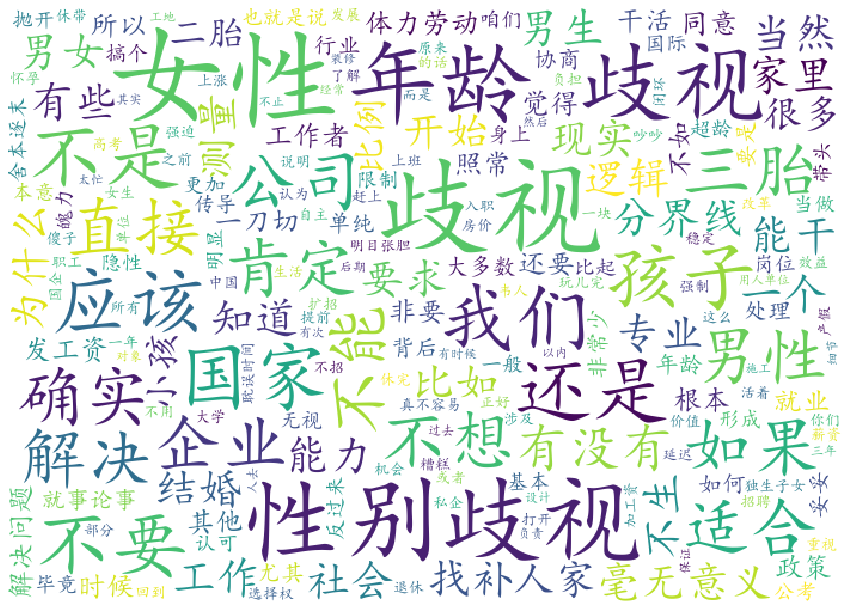

In [16]:
comment = hot_comment['text'].dropna(how='any') #去掉空值
text1 = ''.join(i for i in comment) #把所有字符串连接成一个长文本
word = re.sub(re.compile('，|；|\.|、|。'),'',text1) #去掉逗号等符号
wordlist=" ".join(jieba.cut(word)) #分词后连接
font_path=r'C:\Windows\Fonts\simkai.ttf'
stopwords = list(STOPWORDS)+['你','了','呢','啊','的','没有','但是','就是','因为','还有','这个','那个','这样','什么']# 停用词
wc = WordCloud(font_path=font_path,  # 设置字体

              background_color="white",  # 背景颜色

              max_words=200,  # 词云显示的最大词数

              stopwords = stopwords,        # 设置停用词

              max_font_size=100,  # 字体最大值

              random_state=42,#设置有多少种随机生成状态，即有多少种配色

              width=700, 
               
               height=500,
               
               margin=2,# 设置图片默认的大小,margin为词语边缘距离

              ).generate(wordlist)

plt.figure(figsize=[15,12])

plt.imshow(wc)

plt.axis("off")

plt.savefig("hot_comment.jpg")#必须在plt.show之前，不是图片空白

plt.show()

### 3.2评论人性别分析

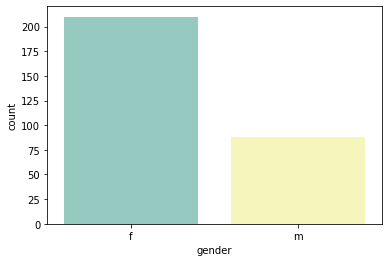

In [17]:
sns.countplot(data=data,x="gender",order=['f', 'm'], palette="Set3");

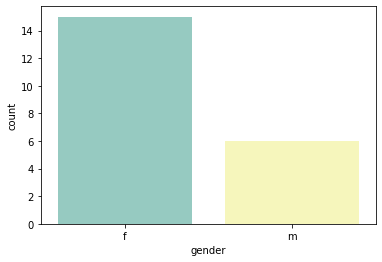

In [18]:
sns.countplot(data=hot_comment,x="gender",order=['f', 'm'],palette="Set3");

### 3.3男性评论

In [19]:
male_comment = data[data['gender'].apply(lambda x: x =="m")]
male_comment.head()

,commenter,gender,text,floor
0,MissX兔兔,m,人家也不说不要女的呀。就说你不符合条件，你怎么办,5
3,睹尔忆晴江,m,可以男女同修产假吗？能解决很多歧视了,119
9,专业碎滤镜,m,你们是真傻还是装傻？就喊下口号你觉得你能敷衍谁啊？,75
11,万物化龍,m,政府把官员的任用比例提高到50%以上，用人单位也不会歧视女性啦！政府都不作为，你凭什么要求企业？,59
12,是言辞,m,人家肯定不会直说你是女生不要你啊,12


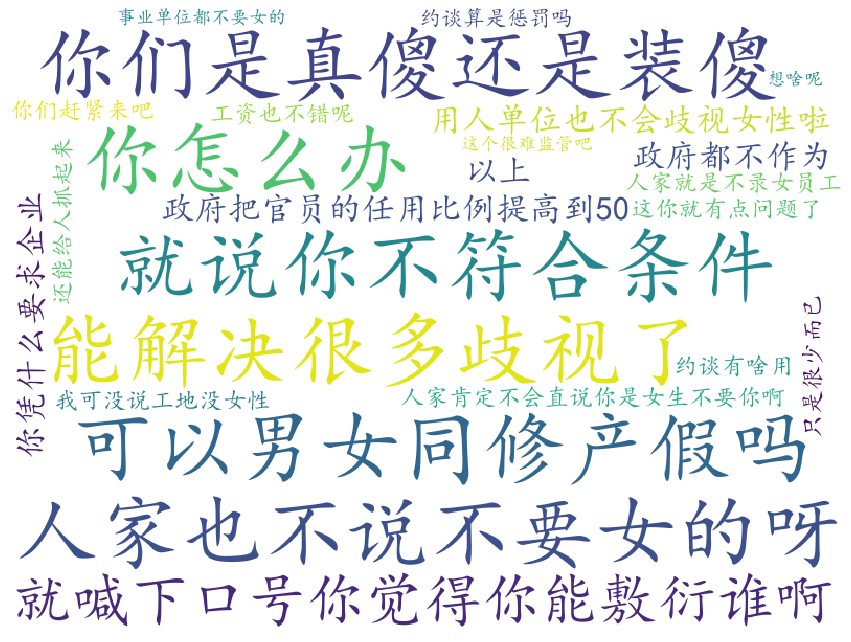

In [20]:
wordcloud=WordCloud(font_path="C:/Windows/Fonts/simkai.ttf",background_color='white',width=800,height=600,max_words=50).generate(str(male_comment['text'])[:615])
plt.figure(figsize=[15,12])
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("male_comment(不分词).jpg")
plt.show()

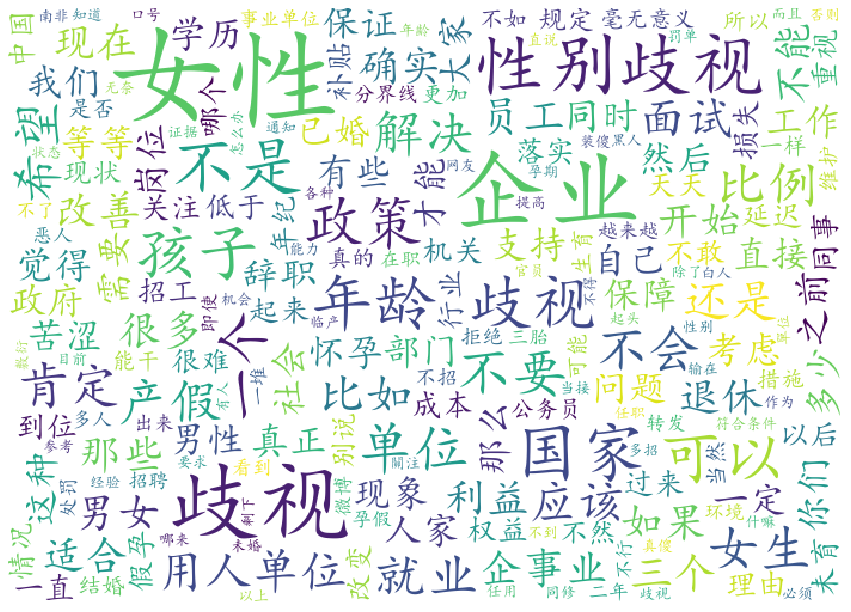

In [21]:
comment = male_comment['text'].dropna(how='any') #去掉空值
text1 = ''.join(i for i in comment) #把所有字符串连接成一个长文本
word = re.sub(re.compile('，|；|\.|、|。'),'',text1) #去掉逗号等符号
wordlist=" ".join(jieba.cut(word)) #分词后连接
font_path=r'C:\Windows\Fonts\simkai.ttf'
stopwords = list(STOPWORDS)+['你','了','呢','啊','的','没有','但是','就是','因为','还有','这个','那个','这样','什么']# 停用词
wc = WordCloud(font_path=font_path,  # 设置字体

              background_color="white",  # 背景颜色

              max_words=200,  # 词云显示的最大词数

              stopwords = stopwords,        # 设置停用词

              max_font_size=100,  # 字体最大值

              random_state=42,#设置有多少种随机生成状态，即有多少种配色

              width=700, 
               
               height=500,
               
               margin=2,# 设置图片默认的大小,margin为词语边缘距离

              ).generate(wordlist)

plt.figure(figsize=[15,12])
plt.imshow(wc)

plt.axis("off")

plt.savefig("male_comment.jpg")#必须在plt.show之前，不是图片空白

plt.show()

### 3.4女性评论

In [22]:
female_comment = data[data['gender'].apply(lambda x: x =="f")]
female_comment.head()

,commenter,gender,text,floor
1,每日美好,f,感觉挺难的…现在很多企业就是不明说，但就会用各种理由把女的刷掉,17
2,cp磕到头掰掉,f,。。这很难，除非有政策，要求企业女员工比例多少，或者女员工多有一定税务政策优惠。。才能真的保...,7
4,司马蒂荧,f,三胎政策一出，有几个企业会明说不要女性？“方便问您现在的婚姻情况吗？”“因为还有其他候选人需...,31
5,lazybabycatssss,f,很多都是隐性性别歧视,9
6,么么么sss,f,女性很多都是隐形性别歧视，我们去应聘都要问恋爱情况和准备什么时候结婚要孩子男生不会问。长胖了...,1095


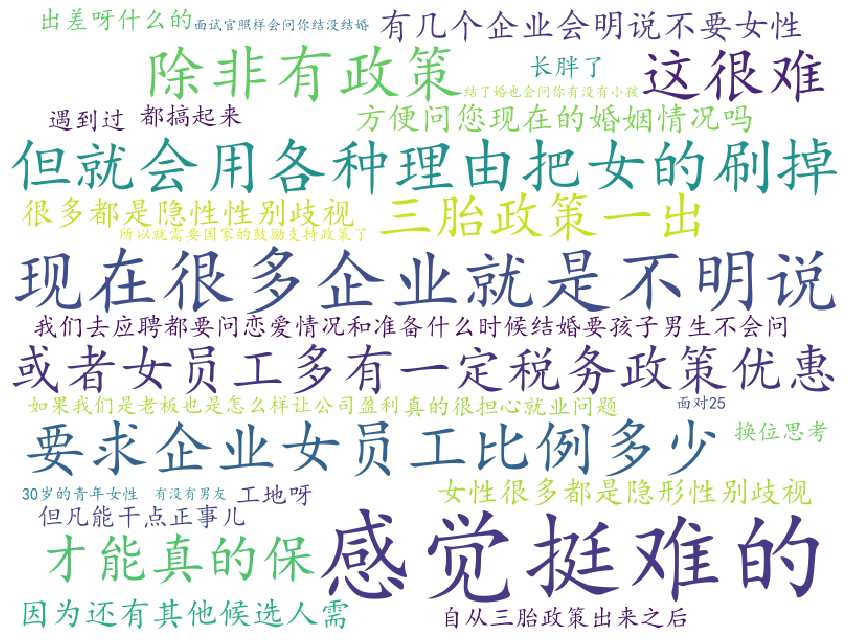

In [23]:
wordcloud=WordCloud(font_path="C:/Windows/Fonts/simkai.ttf",background_color='white',width=800,height=600,max_words=50).generate(str(female_comment['text'])[:628])
plt.figure(figsize=[15,12])
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("female_comment(不分词).jpg")
plt.show()